----------- FINAL PARAMETERS -----------
Theta (rad): 0.516312   |  Theta (deg): 29.5825
M: -0.050000   |  X: 55.0135
----------------------------------------
Mean L1 Error: 25.4014
RMSE (x): 19.7725   |  RMSE (y): 11.1133
R² (x): -1.0852       |  R² (y): -1.0864
----------------------------------------


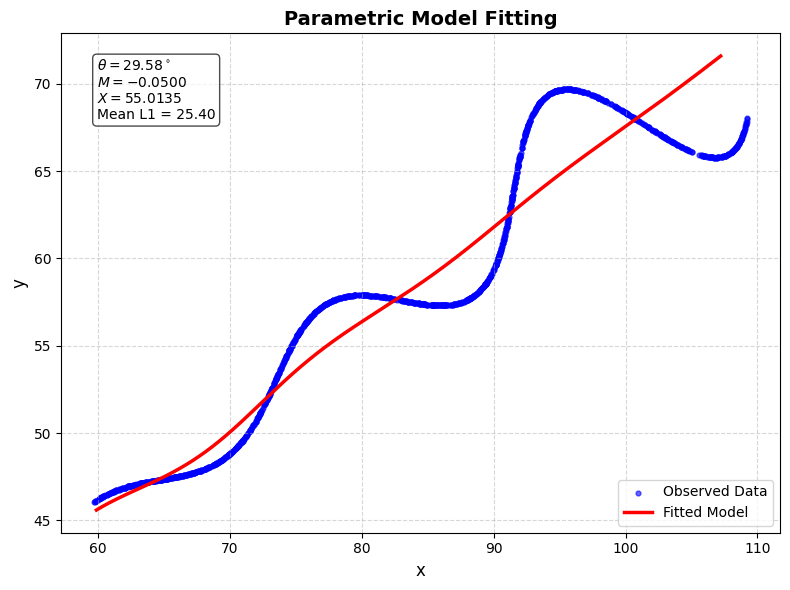

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("/content/xy_data.csv")
x = df["x"].values
y = df["y"].values
t = np.linspace(6, 60, len(x))  # assume uniform sampling for t

# -----------------------------
# 2. Model definition
# -----------------------------
def model(params, t):
    theta, M, X = params
    exp_term = np.exp(M * np.abs(t))
    s = np.sin(0.3 * t)
    x_pred = t * np.cos(theta) - exp_term * s * np.sin(theta) + X
    y_pred = 42 + t * np.sin(theta) + exp_term * s * np.cos(theta)
    return x_pred, y_pred

def residuals(params):
    x_pred, y_pred = model(params, t)
    return np.concatenate([x_pred - x, y_pred - y])

# -----------------------------
# 3. Optimization setup
# -----------------------------
lb = [0.0, -0.05, 0.0]
ub = [np.deg2rad(50.0), 0.05, 100.0]
x0 = [np.deg2rad(20.0), 0.0, 50.0]

res = least_squares(residuals, x0, bounds=(lb, ub))
theta_rad, M_opt, X_opt = res.x
theta_deg = np.rad2deg(theta_rad)

# -----------------------------
# 4. Model evaluation
# -----------------------------
x_pred, y_pred = model(res.x, t)
L1 = np.mean(np.abs(x_pred - x) + np.abs(y_pred - y))
rmse_x = np.sqrt(mean_squared_error(x, x_pred))
rmse_y = np.sqrt(mean_squared_error(y, y_pred))
r2_x = r2_score(x, x_pred)
r2_y = r2_score(y, y_pred)

# -----------------------------
# 5. Results summary
# -----------------------------
print("----------- FINAL PARAMETERS -----------")
print(f"Theta (rad): {theta_rad:.6f}   |  Theta (deg): {theta_deg:.4f}")
print(f"M: {M_opt:.6f}   |  X: {X_opt:.4f}")
print("----------------------------------------")
print(f"Mean L1 Error: {L1:.4f}")
print(f"RMSE (x): {rmse_x:.4f}   |  RMSE (y): {rmse_y:.4f}")
print(f"R² (x): {r2_x:.4f}       |  R² (y): {r2_y:.4f}")
print("----------------------------------------")

# -----------------------------
# 6. Visualization
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(x, y, s=12, c='blue', alpha=0.6, label="Observed Data")
plt.plot(x_pred, y_pred, 'r', lw=2.5, label="Fitted Model")

# annotate key parameters on plot
textstr = '\n'.join((
    r'$\theta = %.2f^\circ$' % (theta_deg, ),
    r'$M = %.4f$' % (M_opt, ),
    r'$X = %.4f$' % (X_opt, ),
    r'Mean L1 = %.2f' % (L1, )))
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Parametric Model Fitting", fontsize=14, weight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
